In [126]:
import pandas as pd
import numpy as np

In [127]:
df_accounts = pd.read_csv("twm_accounts.csv", sep=";")
df_accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [128]:
df_sv_accounts = pd.read_csv("twm_savings_acct.csv", sep=";")
df_sv_accounts.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [129]:
df_sv_accounts["total_savings"] = df_sv_accounts["ending_balance"] - df_sv_accounts["starting_balance"]
df_sv_accounts.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_savings
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33


In [130]:
df_sv_accounts_clean = df_sv_accounts[["cust_id", "total_savings"]]
df_sv_accounts_clean.head()

,cust_id,total_savings
0,1363160,9.50
1,1362487,-638.84
2,1362548,3.78
3,1362752,9.07
4,1363017,890.33


In [131]:
df_cr_accounts = pd.read_csv("twm_credit_acct.csv", sep=";")
df_cr_accounts.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [132]:
df_cr_accounts["total_debt"] = df_cr_accounts["ending_balance"] - df_cr_accounts["starting_balance"]
df_cr_accounts.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_debt
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,-370.77
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,-6896.57
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,-2302.14
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1000.00


In [133]:
df_cr_accounts_clean = df_cr_accounts[["cust_id", "total_debt"]]

In [134]:
df_sv_cr_accounts = df_sv_accounts_clean.merge(df_cr_accounts_clean, how="left", on="cust_id")
df_sv_cr_accounts.head(20)

,cust_id,total_savings,total_debt
0,1363160,9.50,-370.77
1,1362487,-638.84,1548.23
2,1362548,3.78,-6896.57
3,1362752,9.07,-2302.14
4,1363017,890.33,1000.00
5,1362609,-709.02,1224.93
6,1363465,17.44,NaN
7,1363078,468.57,-1238.14
8,1362588,-242.53,546.55
9,1363343,1403.83,NaN


In [135]:
df_sv_cr_accounts = df_sv_cr_accounts.fillna(0)

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df_sv_cr_accounts[["total_savings", "total_debt"]]

scaled_data = scaler.fit_transform(data)

In [156]:
df_scaled_data = pd.DataFrame(scaled_data, columns=["total_savings", "total_debt"])

In [157]:
df_scaled_data = pd.concat([df_sv_cr_accounts["cust_id"], df_scaled_data], axis=1)

In [158]:
df_scaled_data.head()

,cust_id,total_savings,total_debt
0,1363160,-0.349709,-0.223901
1,1362487,-0.955130,0.933211
2,1362548,-0.355050,-4.158805
3,1362752,-0.350110,-1.388472
4,1363017,0.472812,0.602641


In [159]:
df_bank_behavior = pd.read_csv("cust_account_info_2.csv")

In [160]:
df_bank_behavior.head()

,cust_id,SV_withdrawal_avg_normalized,SV_deposit_avg_normalized,CC_avg_transaction_normalized,CC_avg_payment_normalized,CC_avg_cash_advance_normalized,SV_avg_bal_normalized,CC_avg_bal_normalized,SV_small_withdrawal_counts_normalized,SV_large_withdrawal_counts_normalized,SV_deposit_counts_normalized,CC_small_transaction_count_normalized,CC_large_transaction_count_normalized,CC_payment_count_normalized,CC_cash_advance_count_normalized
0,1362480,0.388708,0.254633,0.298375,0.049571,1.000,0.055542,0.162876,0.0,0.210526,0.30,0.000000,0.136364,1.000000,0.018519
1,1362484,0.279045,0.139404,0.171344,0.052318,0.700,0.047397,0.019732,0.1,0.157895,0.85,0.434783,0.254545,1.000000,0.018519
2,1362485,0.000000,0.000000,0.174298,0.056554,0.570,0.000000,0.049652,0.0,0.000000,0.00,0.434783,0.363636,1.000000,0.129630
3,1362486,0.093377,0.120870,0.000000,0.000000,0.000,0.006621,0.000000,0.3,0.315789,0.20,0.000000,0.000000,0.000000,0.000000
4,1362487,0.118350,0.095085,0.169867,0.046365,0.835,0.016910,0.056899,0.2,0.263158,0.05,0.260870,0.154545,0.333333,0.055556


In [161]:
df_bank_behavior = df_bank_behavior.merge(df_scaled_data, how="left", on="cust_id")

In [162]:
df_bank_behavior = df_bank_behavior.fillna(0)

In [163]:
df_bank_behavior.drop(["cust_id"], axis=1, inplace=True)
df_bank_behavior.head()

,SV_withdrawal_avg_normalized,SV_deposit_avg_normalized,CC_avg_transaction_normalized,CC_avg_payment_normalized,CC_avg_cash_advance_normalized,SV_avg_bal_normalized,CC_avg_bal_normalized,SV_small_withdrawal_counts_normalized,SV_large_withdrawal_counts_normalized,SV_deposit_counts_normalized,CC_small_transaction_count_normalized,CC_large_transaction_count_normalized,CC_payment_count_normalized,CC_cash_advance_count_normalized,total_savings,total_debt
0,0.388708,0.254633,0.298375,0.049571,1.000,0.055542,0.162876,0.0,0.210526,0.30,0.000000,0.136364,1.000000,0.018519,0.090467,-0.957500
1,0.279045,0.139404,0.171344,0.052318,0.700,0.047397,0.019732,0.1,0.157895,0.85,0.434783,0.254545,1.000000,0.018519,1.441239,-0.548477
2,0.000000,0.000000,0.174298,0.056554,0.570,0.000000,0.049652,0.0,0.000000,0.00,0.434783,0.363636,1.000000,0.129630,0.000000,0.000000
3,0.093377,0.120870,0.000000,0.000000,0.000,0.006621,0.000000,0.3,0.315789,0.20,0.000000,0.000000,0.000000,0.000000,-0.515682,-0.000335
4,0.118350,0.095085,0.169867,0.046365,0.835,0.016910,0.056899,0.2,0.263158,0.05,0.260870,0.154545,0.333333,0.055556,-0.955130,0.933211


### PCA

In [164]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

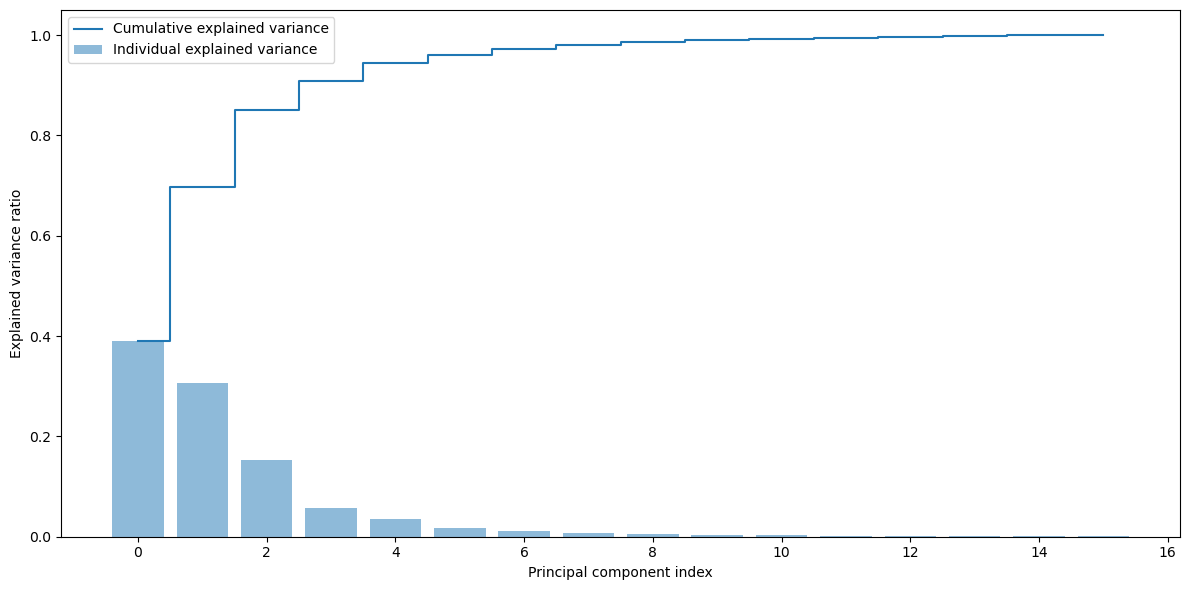

In [165]:
# Instantiate PCA

pca = PCA()

# Determine PCA transformed features

pca_datatrans = pca.fit_transform(df_bank_behavior)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# saving PCA components to a dataframe
df_pca_datatrans = pd.DataFrame(pca_datatrans)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[0.38956682 0.69655315 0.8498368  0.90800347 0.94366974 0.96119209
 0.97256153 0.98035035 0.98575916 0.98958196 0.99261285 0.99485497
 0.99704269 0.99839655 0.99949706 1.        ]


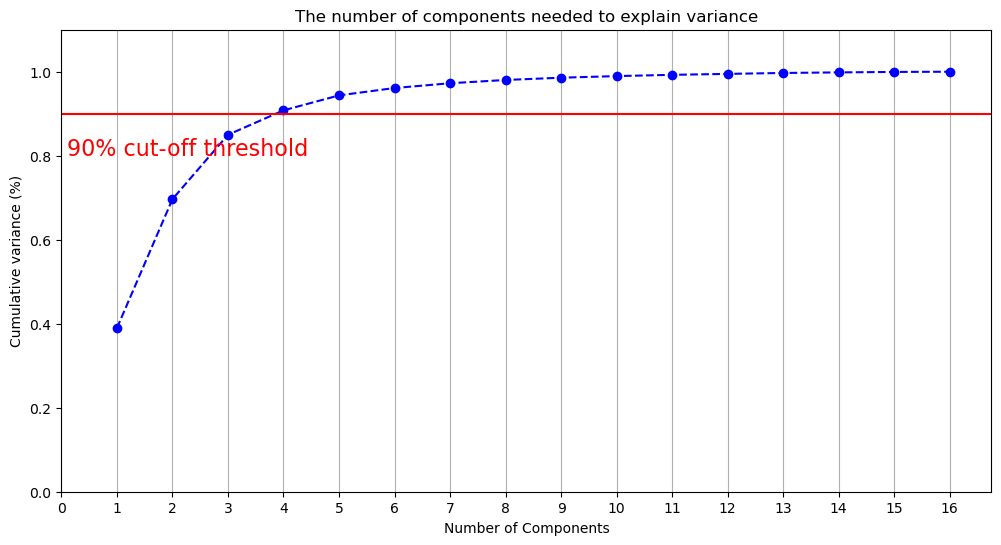

In [166]:
# pca = PCA().fit(df_numcat_cust_scaled)

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.10, 0.80, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [167]:
# Choosing top 5 PCs which gives ~85 % of variance
pca_datatrans_top5 = pca_datatrans[:,:5]
pca_datatrans_top5

array([[ 0.78935678, -0.57697565,  0.67653992,  0.16843001,  0.45351887],
       [ 1.49875346,  0.63864243,  0.5754624 ,  0.26611416, -0.05320498],
       [ 0.01102153, -0.03312188,  0.59469495, -0.33785371, -0.01702659],
       ...,
       [-1.16872298,  1.1693586 ,  0.84527239,  0.13200725,  0.36105156],
       [-0.13895548, -0.08890471, -0.64255093,  0.20416767,  0.01589525],
       [ 0.04060223,  0.09431399, -0.63459403,  0.47241877, -0.03598329]])

### K Means Clustering

In [168]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [169]:
def plot_distortion(X,max_clusters = 20):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

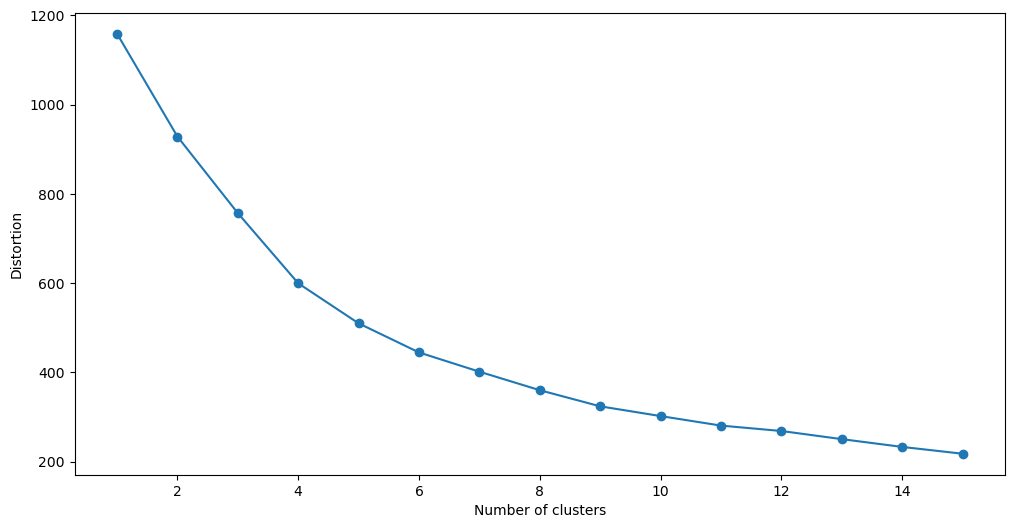

In [170]:
# elbow rule

plot_distortion(pca_datatrans_top5, 15)

In [171]:
# #Plot Elbow Curve to determine number of clusters

# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn import metrics

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,11), timings=False)

# visualizer.fit(pca_datatrans_top5)
# visualizer.show()

For n_clusters = 4 The average silhouette_score is : 0.3210297446275923
For n_clusters = 5 The average silhouette_score is : 0.35055592219102816
For n_clusters = 6 The average silhouette_score is : 0.36068124144154573
For n_clusters = 7 The average silhouette_score is : 0.36607484940870705


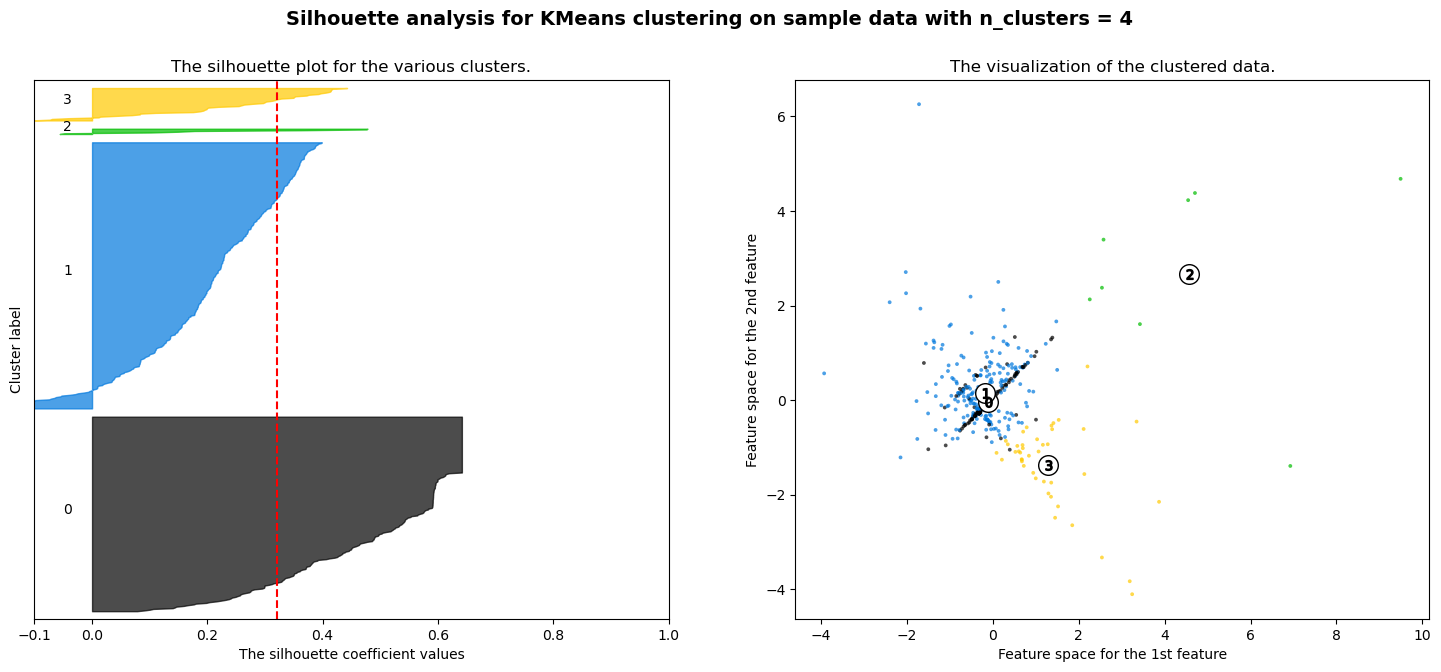

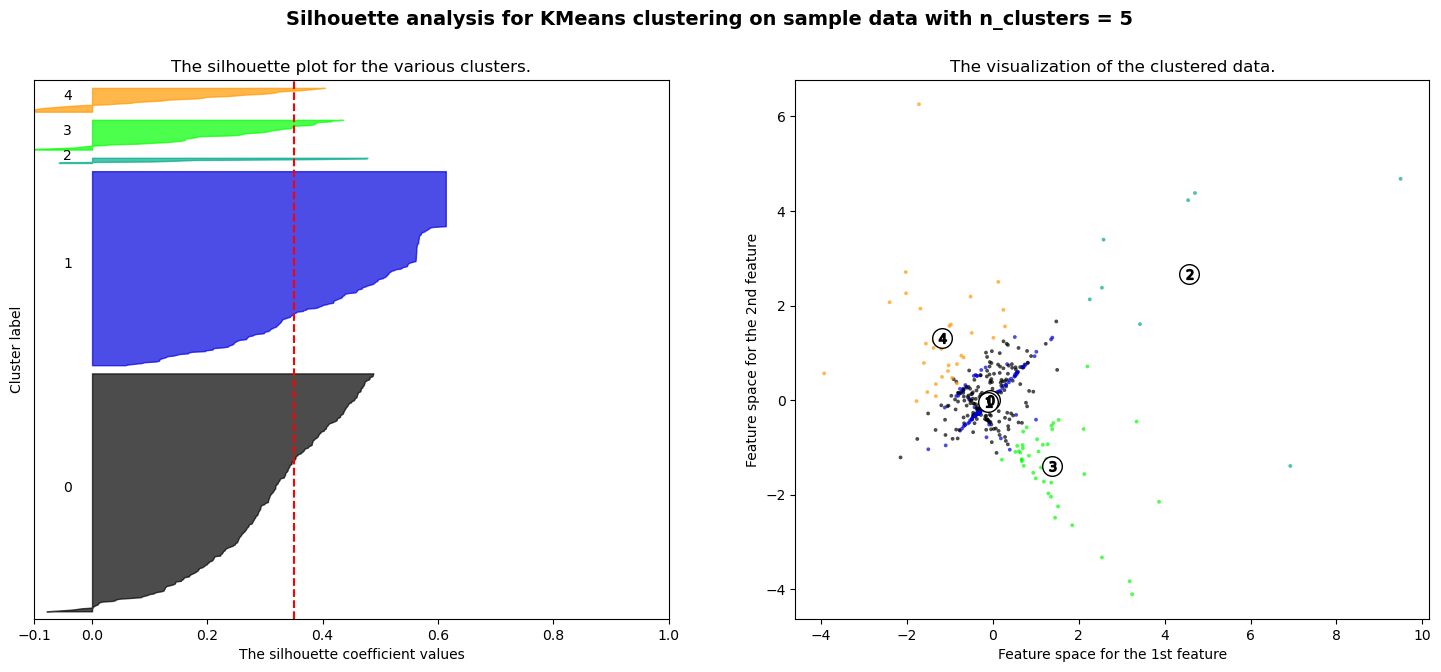

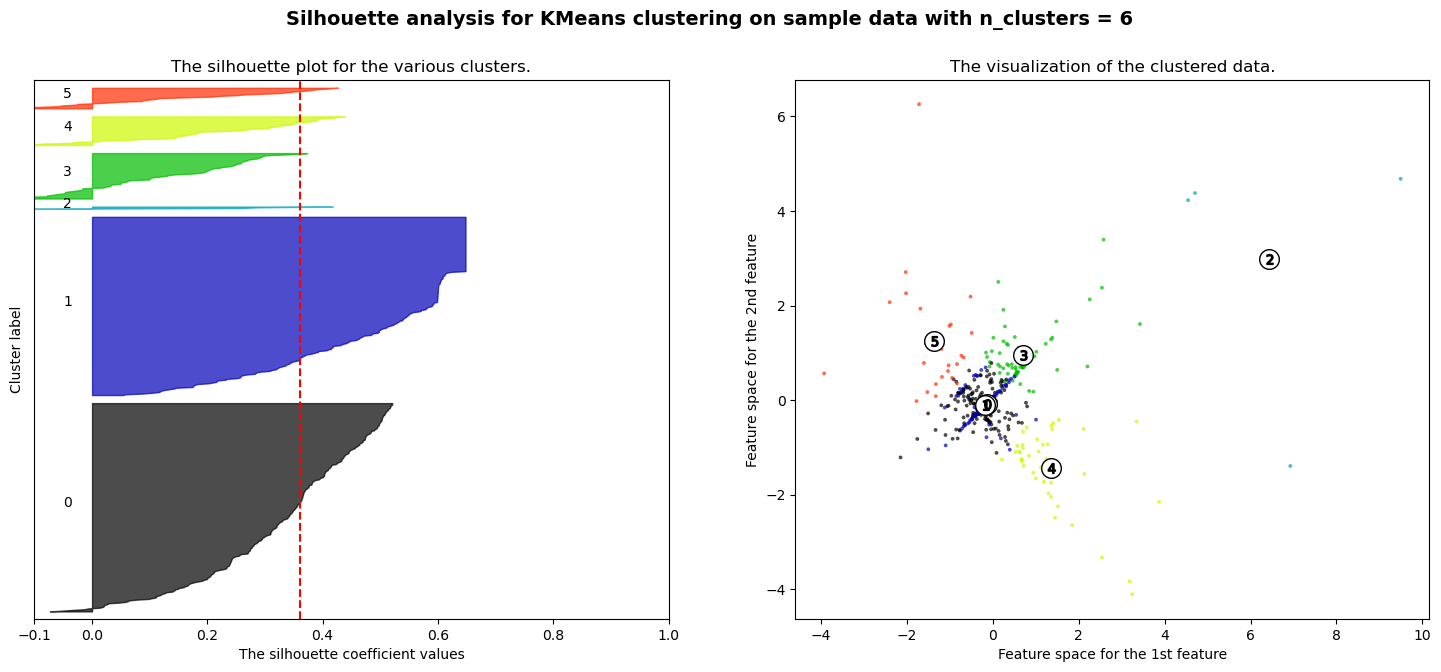

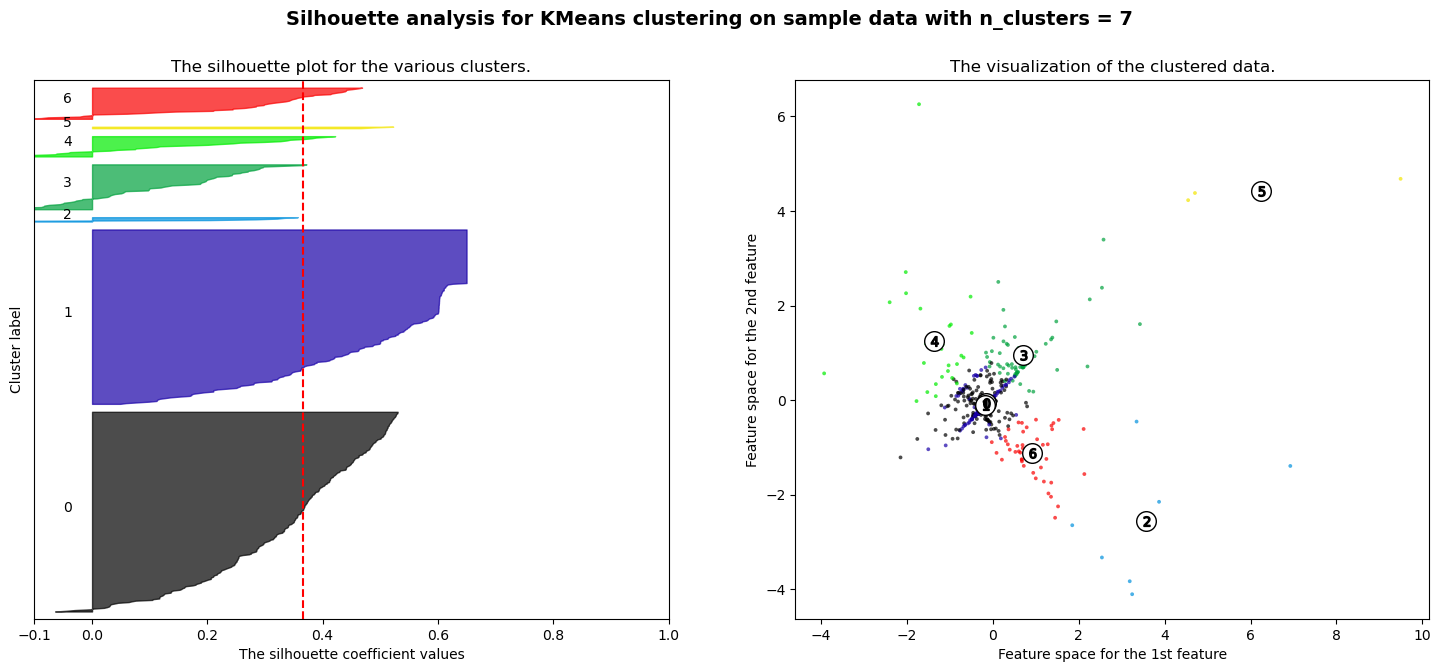

In [172]:
# Silouette for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [4, 5, 6, 7]

X = pca_datatrans_top5    # the top 4 PCs 

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Model For Prediction

In [173]:
km_labels = KMeans(n_clusters = 6, # how many clusters we expected 
            n_init=30,   # how many initial runs
            random_state=0)

In [174]:
# fit and predict
y_km_labels = km_labels.fit_predict(pca_datatrans_top5)

In [175]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    fig = plt.figure()

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                   y,
                   s=50,
                   marker='s',
                   label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                   Y_centroids,
                   marker='*',
                   c='black',
                   s=250,
                   label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

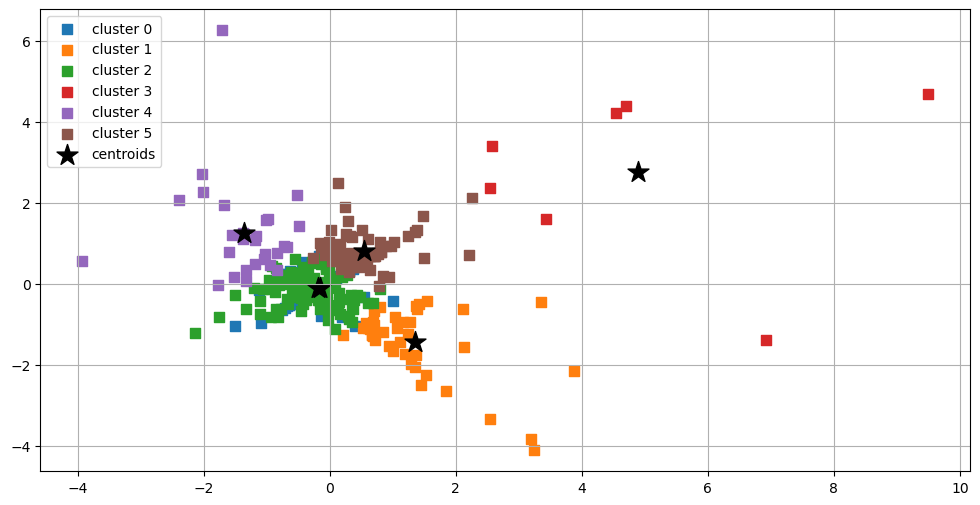

In [176]:
plot_clusters(pca_datatrans_top5, y_km_labels, plt_cluster_centers = True)

In [177]:
# import DBSCAN
from sklearn.cluster import DBSCAN

In [178]:
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

In [179]:
# fit and predicr
y_db = db.fit_predict(pca_datatrans_top5)

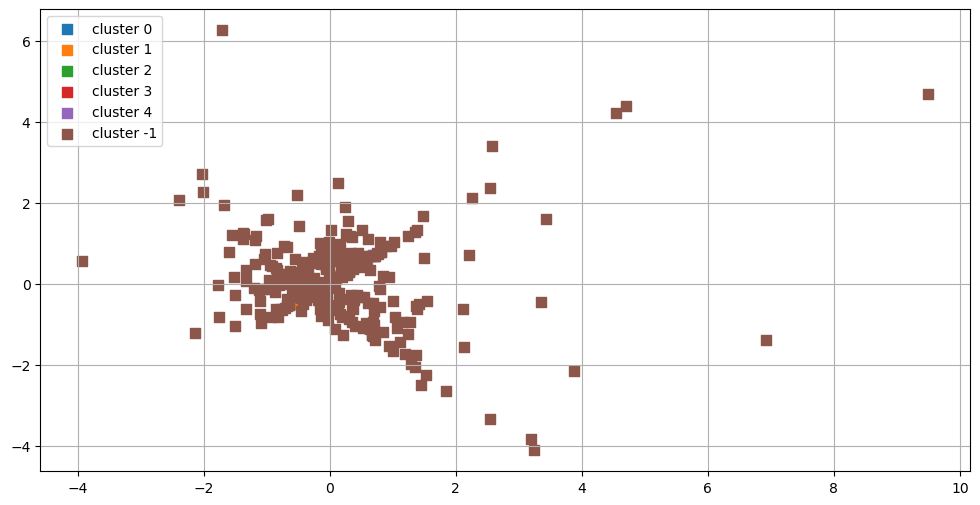

In [180]:
# Plot DBSCAN clusters
plot_clusters(pca_datatrans_top5,y_db)

In [181]:
df_radar = df_bank_behavior.copy()
df_radar['Cluster'] = km_labels.labels_
df_radar.head()

,SV_withdrawal_avg_normalized,SV_deposit_avg_normalized,CC_avg_transaction_normalized,CC_avg_payment_normalized,CC_avg_cash_advance_normalized,SV_avg_bal_normalized,CC_avg_bal_normalized,SV_small_withdrawal_counts_normalized,SV_large_withdrawal_counts_normalized,SV_deposit_counts_normalized,CC_small_transaction_count_normalized,CC_large_transaction_count_normalized,CC_payment_count_normalized,CC_cash_advance_count_normalized,total_savings,total_debt,Cluster
0,0.388708,0.254633,0.298375,0.049571,1.000,0.055542,0.162876,0.0,0.210526,0.30,0.000000,0.136364,1.000000,0.018519,0.090467,-0.957500,1
1,0.279045,0.139404,0.171344,0.052318,0.700,0.047397,0.019732,0.1,0.157895,0.85,0.434783,0.254545,1.000000,0.018519,1.441239,-0.548477,5
2,0.000000,0.000000,0.174298,0.056554,0.570,0.000000,0.049652,0.0,0.000000,0.00,0.434783,0.363636,1.000000,0.129630,0.000000,0.000000,2
3,0.093377,0.120870,0.000000,0.000000,0.000,0.006621,0.000000,0.3,0.315789,0.20,0.000000,0.000000,0.000000,0.000000,-0.515682,-0.000335,0
4,0.118350,0.095085,0.169867,0.046365,0.835,0.016910,0.056899,0.2,0.263158,0.05,0.260870,0.154545,0.333333,0.055556,-0.955130,0.933211,4


In [182]:
df_radar_grouped = df_radar.groupby(['Cluster']).mean()
df_radar_grouped

,SV_withdrawal_avg_normalized,SV_deposit_avg_normalized,CC_avg_transaction_normalized,CC_avg_payment_normalized,CC_avg_cash_advance_normalized,SV_avg_bal_normalized,CC_avg_bal_normalized,SV_small_withdrawal_counts_normalized,SV_large_withdrawal_counts_normalized,SV_deposit_counts_normalized,CC_small_transaction_count_normalized,CC_large_transaction_count_normalized,CC_payment_count_normalized,CC_cash_advance_count_normalized,total_savings,total_debt
Cluster,,,,,,,,,,,,,,,,
0,0.060654,0.056812,0.038460,0.012472,0.030958,0.021571,0.013366,0.082083,0.129167,0.143333,0.022283,0.018485,0.052431,0.004861,-0.178000,0.026882
1,0.128176,0.145246,0.204099,0.125172,0.448750,0.056667,0.073190,0.097500,0.194737,0.225000,0.142391,0.144091,0.787500,0.055556,-0.018505,-1.974285
2,0.061830,0.057302,0.218270,0.059932,0.438953,0.019591,0.070411,0.086282,0.125024,0.127978,0.268875,0.224516,0.900120,0.071266,-0.187666,0.048981
3,0.394757,0.698400,0.309137,0.113272,0.514286,0.367463,0.225218,0.014286,0.563910,0.614286,0.043478,0.146753,0.452381,0.029101,5.374038,-1.309371
4,0.203190,0.196143,0.343198,0.070805,0.630000,0.080631,0.155453,0.148276,0.292196,0.272414,0.167916,0.220376,0.445402,0.060026,-0.216417,1.826060
5,0.177555,0.228579,0.145290,0.036978,0.373056,0.057879,0.046028,0.165278,0.340643,0.514583,0.204106,0.160859,0.637731,0.060700,0.890299,0.210584


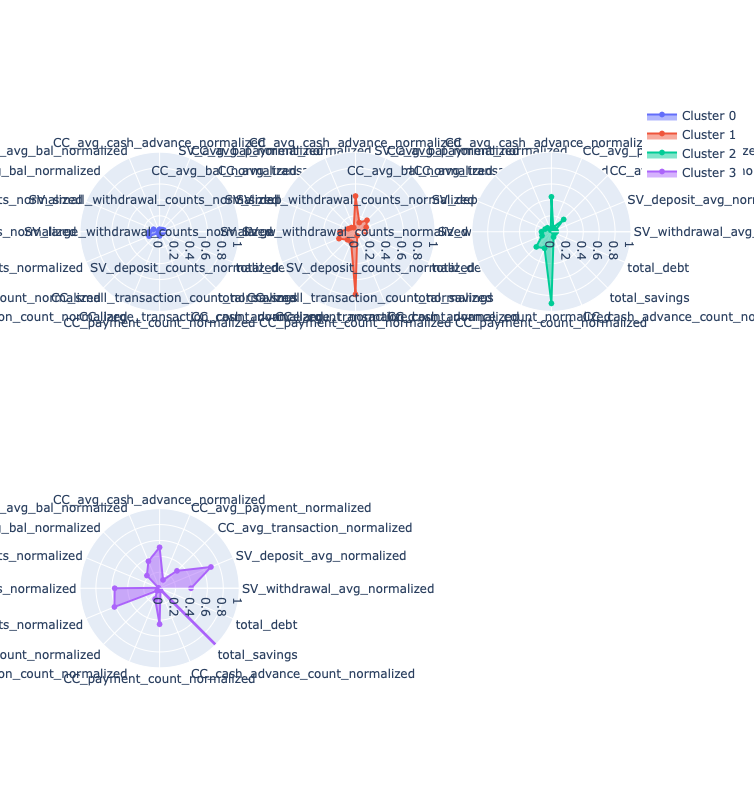

In [183]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2)

abbrev = df_radar_grouped.columns.tolist()

n_clusters = 4

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    fig.add_trace(go.Scatterpolar(
        r=df_radar_grouped.loc[i],
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 3 + 1,
        i % 3 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        showlegend=True
        )
fig.update_layout(height=800, width=1000)
fig.show()